In [120]:
import numpy as np
import pandas as pd

In [121]:
df=pd.read_csv('speeddating.csv')
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,10,11,15,16,17,18,19,39,40,41,42,43,44,51,52,53,54,55,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,107,109) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,0,1,female,21,27,6,[4-6],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-3],[3-5],7,6,[6-8],[5-6],0,1,0,0
1,0,1,female,21,22,1,[0-1],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-3],[3-5],7,5,[6-8],[5-6],1,1,0,0
2,1,1,female,21,22,1,[0-1],'Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American',1,...,[0-3],[3-5],7,?,[6-8],[0-4],1,1,1,1
3,0,1,female,21,23,2,[2-3],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-3],[3-5],7,6,[6-8],[5-6],0,1,1,1
4,0,1,female,21,24,3,[2-3],'Asian/Pacific Islander/Asian-American','Latino/Hispanic American',0,...,[0-3],[3-5],6,6,[6-8],[5-6],0,1,1,1


In [122]:
df.shape

(8378, 123)

In [123]:
df.dtypes

has_null               int64
wave                   int64
gender                object
age                   object
age_o                 object
                       ...  
d_guess_prob_liked    object
met                   object
decision               int64
decision_o             int64
match                  int64
Length: 123, dtype: object

In [124]:
df.describe()

,has_null,wave,d_age,samerace,decision,decision_o,match
count,8378.00000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000
mean,0.87491,11.350919,4.185605,0.395799,0.419909,0.419551,0.164717
std,0.33084,5.995903,4.596171,0.489051,0.493573,0.493515,0.370947
min,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.00000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.00000,11.000000,3.000000,0.000000,0.000000,0.000000,0.000000
75%,1.00000,15.000000,5.000000,1.000000,1.000000,1.000000,0.000000
max,1.00000,21.000000,37.000000,1.000000,1.000000,1.000000,1.000000


In [125]:
df.gender.unique()

array(['female', 'male'], dtype=object)

<AxesSubplot:>

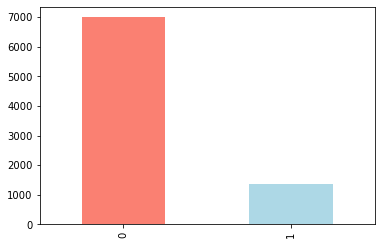

In [126]:
import matplotlib.pyplot as plt
%matplotlib inline
df.match.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [127]:
dummies=pd.get_dummies(df.gender)
dummies

,female,male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
8373,0,1
8374,0,1
8375,0,1
8376,0,1


In [128]:
df=pd.concat([df,dummies], axis=1)
df

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match,female,male
0,0,1,female,21,27,6,[4-6],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,7,6,[6-8],[5-6],0,1,0,0,1,0
1,0,1,female,21,22,1,[0-1],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,7,5,[6-8],[5-6],1,1,0,0,1,0
2,1,1,female,21,22,1,[0-1],'Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American',1,...,7,?,[6-8],[0-4],1,1,1,1,1,0
3,0,1,female,21,23,2,[2-3],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,7,6,[6-8],[5-6],0,1,1,1,1,0
4,0,1,female,21,24,3,[2-3],'Asian/Pacific Islander/Asian-American','Latino/Hispanic American',0,...,6,6,[6-8],[5-6],0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,1,21,male,25,26,1,[0-1],European/Caucasian-American,'Latino/Hispanic American',0,...,2,5,[0-5],[5-6],0,0,1,0,0,1
8374,1,21,male,25,24,1,[0-1],European/Caucasian-American,Other,0,...,4,4,[0-5],[0-4],0,0,0,0,0,1
8375,1,21,male,25,29,4,[4-6],European/Caucasian-American,'Latino/Hispanic American',0,...,6,5,[6-8],[5-6],0,0,0,0,0,1
8376,1,21,male,25,22,3,[2-3],European/Caucasian-American,'Asian/Pacific Islander/Asian-American',0,...,5,5,[0-5],[5-6],0,0,1,0,0,1


In [129]:
df=df.drop('gender', axis=1)

In [130]:
df.isnull().sum()

has_null      0
wave          0
age           0
age_o         0
d_age         0
             ..
decision      0
decision_o    0
match         0
female        0
male          0
Length: 124, dtype: int64

In [131]:
df_range=df.loc[:, df.columns.str.startswith('d_')]
df_range=df_range.drop('d_age', axis=1)

In [132]:
def average(X):
     X=X[1:-1]
     token = X.split("-")
     if(token[0]==''):
            token[0]=0
     if(token[1]==''):
            token[0]=0
     else:
      token[0]=float(token[0])  
      token[1]=float(token[1])  
      avg=(token[0]+token[1])/2
      
      return(avg)

In [133]:
df_range.columns

Index(['d_d_age', 'd_importance_same_race', 'd_importance_same_religion',
       'd_pref_o_attractive', 'd_pref_o_sincere', 'd_pref_o_intelligence',
       'd_pref_o_funny', 'd_pref_o_ambitious', 'd_pref_o_shared_interests',
       'd_attractive_o', 'd_sinsere_o', 'd_intelligence_o', 'd_funny_o',
       'd_ambitous_o', 'd_shared_interests_o', 'd_attractive_important',
       'd_sincere_important', 'd_intellicence_important', 'd_funny_important',
       'd_ambtition_important', 'd_shared_interests_important', 'd_attractive',
       'd_sincere', 'd_intelligence', 'd_funny', 'd_ambition',
       'd_attractive_partner', 'd_sincere_partner', 'd_intelligence_partner',
       'd_funny_partner', 'd_ambition_partner', 'd_shared_interests_partner',
       'd_sports', 'd_tvsports', 'd_exercise', 'd_dining', 'd_museums',
       'd_art', 'd_hiking', 'd_gaming', 'd_clubbing', 'd_reading', 'd_tv',
       'd_theater', 'd_movies', 'd_concerts', 'd_music', 'd_shopping',
       'd_yoga', 'd_interests_cor

In [134]:
for i in df_range.columns:
    df[i]=df_range[i].apply(lambda x: average(x))

In [135]:
df

,has_null,wave,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,...,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match,female,male
0,0,1,21,27,6,5.0,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,...,7,6,7.0,5.5,0,1,0,0,1,0
1,0,1,21,22,1,0.5,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,...,7,5,7.0,5.5,1,1,0,0,1,0
2,1,1,21,22,1,0.5,'Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American',1,2,...,7,?,7.0,2.0,1,1,1,1,1,0
3,0,1,21,23,2,2.5,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,...,7,6,7.0,5.5,0,1,1,1,1,0
4,0,1,21,24,3,2.5,'Asian/Pacific Islander/Asian-American','Latino/Hispanic American',0,2,...,6,6,7.0,5.5,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,1,21,25,26,1,0.5,European/Caucasian-American,'Latino/Hispanic American',0,1,...,2,5,2.5,5.5,0,0,1,0,0,1
8374,1,21,25,24,1,0.5,European/Caucasian-American,Other,0,1,...,4,4,2.5,2.0,0,0,0,0,0,1
8375,1,21,25,29,4,5.0,European/Caucasian-American,'Latino/Hispanic American',0,1,...,6,5,7.0,5.5,0,0,0,0,0,1
8376,1,21,25,22,3,2.5,European/Caucasian-American,'Asian/Pacific Islander/Asian-American',0,1,...,5,5,2.5,5.5,0,0,1,0,0,1


In [136]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [137]:
#new_cols=['race','race_o']
df['race']=le.fit_transform(df['race'])

In [138]:
df['race_o']=le.fit_transform(df['race_o'])

In [139]:
df.head()
cols=df.columns

In [140]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values='?', strategy='most_frequent')

In [141]:
df=imp.fit_transform(df)

In [142]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [143]:
#df=scaler.fit_transform(df)

In [144]:
df=pd.DataFrame(df, columns=cols)
df

,has_null,wave,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,...,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match,female,male
0,0,1,21,27,6,5.0,0,4,0,2,...,7,6,7.0,5.5,0,1,0,0,1,0
1,0,1,21,22,1,0.5,0,4,0,2,...,7,5,7.0,5.5,1,1,0,0,1,0
2,1,1,21,22,1,0.5,0,0,1,2,...,7,5,7.0,2.0,1,1,1,1,1,0
3,0,1,21,23,2,2.5,0,4,0,2,...,7,6,7.0,5.5,0,1,1,1,1,0
4,0,1,21,24,3,2.5,0,2,0,2,...,6,6,7.0,5.5,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,1,21,25,26,1,0.5,4,2,0,1,...,2,5,2.5,5.5,0,0,1,0,0,1
8374,1,21,25,24,1,0.5,4,5,0,1,...,4,4,2.5,2.0,0,0,0,0,0,1
8375,1,21,25,29,4,5.0,4,2,0,1,...,6,5,7.0,5.5,0,0,0,0,0,1
8376,1,21,25,22,3,2.5,4,0,0,1,...,5,5,2.5,5.5,0,0,1,0,0,1
